In [1]:
import os
import pandas as pd
from PIL import Image

def extract_image_data(input_folder, output_csv):
    # Initialize lists to store data
    image_data = []
    labels = []

    # Iterate through each subfolder in the input folder
    for folder_name in os.listdir(input_folder):
        folder_path = os.path.join(input_folder, folder_name)

        # Check if it's a directory
        if os.path.isdir(folder_path):
            # Iterate through each image in the folder
            for image_name in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_name)

                # Read image using PIL
                try:
                    img = Image.open(image_path)
                    img_data = list(img.getdata())  # Get pixel values
                    image_data.append(img_data)
                    labels.append(folder_name)  # Assuming folder name is the label
                except Exception as e:
                    print(f"Error processing image {image_path}: {e}")

    # Create a DataFrame and save it to a CSV file
    df = pd.DataFrame(image_data)
    df['label'] = labels
    df.to_csv(output_csv, index=False)
    print(f"CSV file saved to {output_csv}")

# Example usage
input_folder = r"C:\Users\Yalavarthi Saadhika\Downloads\mnist\New folder"
output_csv = 'image_data.csv'
extract_image_data(input_folder, output_csv)

CSV file saved to image_data.csv


# Loading the Data

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("image_data.csv")

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


In [8]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z
372449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z
372450,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z


In [9]:
df.shape

(372451, 785)

In [11]:
df.label.value_counts()

O    57825
S    48419
U    29008
C    23409
T    22495
P    19341
N    19010
A    13870
M    12336
L    11586
R    11566
E    11440
Y    10859
W    10784
D    10134
B     8668
J     8493
H     7218
X     6272
Z     6076
Q     5812
G     5762
K     5603
V     4182
F     1163
I     1120
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

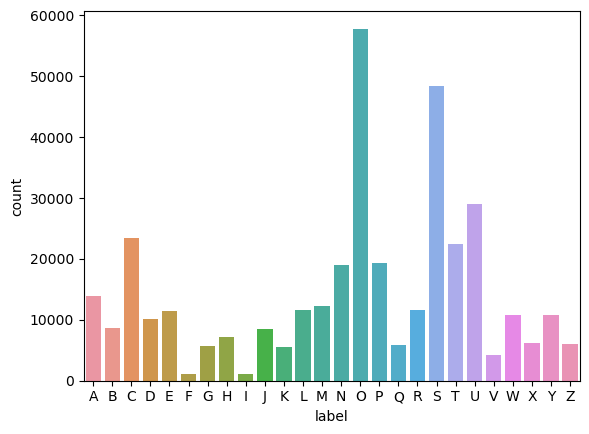

In [12]:
sns.countplot(data=df, x='label')

In [13]:
X = df.drop('label', axis=1)

y = df['label']

In [14]:
idx = np.random.randint(0, 372451, 26)

print(idx)

[ 27314 353661 314480 102603 101423 140160 303744 330822 214134 239069
 351568 264612 261045  40840 280678 309604   7695 314476 303118 178542
 268330 290766 133074 299702 342347 102485]


L
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  25 132  67   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  64 195 166  50   1   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 127 230 255 115   8   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 173 252 255 115   8   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  16 180 252 255 115   8   0   0 

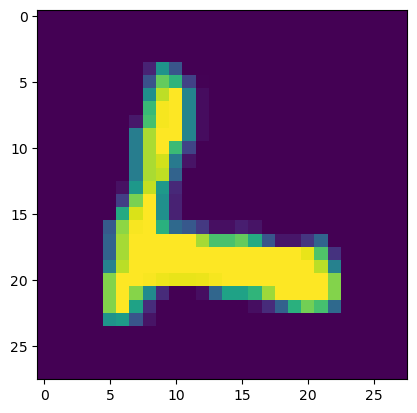

In [15]:
print(y[idx[4]])

print(np.reshape(X.values[idx[4]], (28,28)))

img = np.reshape(X.values[idx[4]], (28,28))

plt.imshow(img)

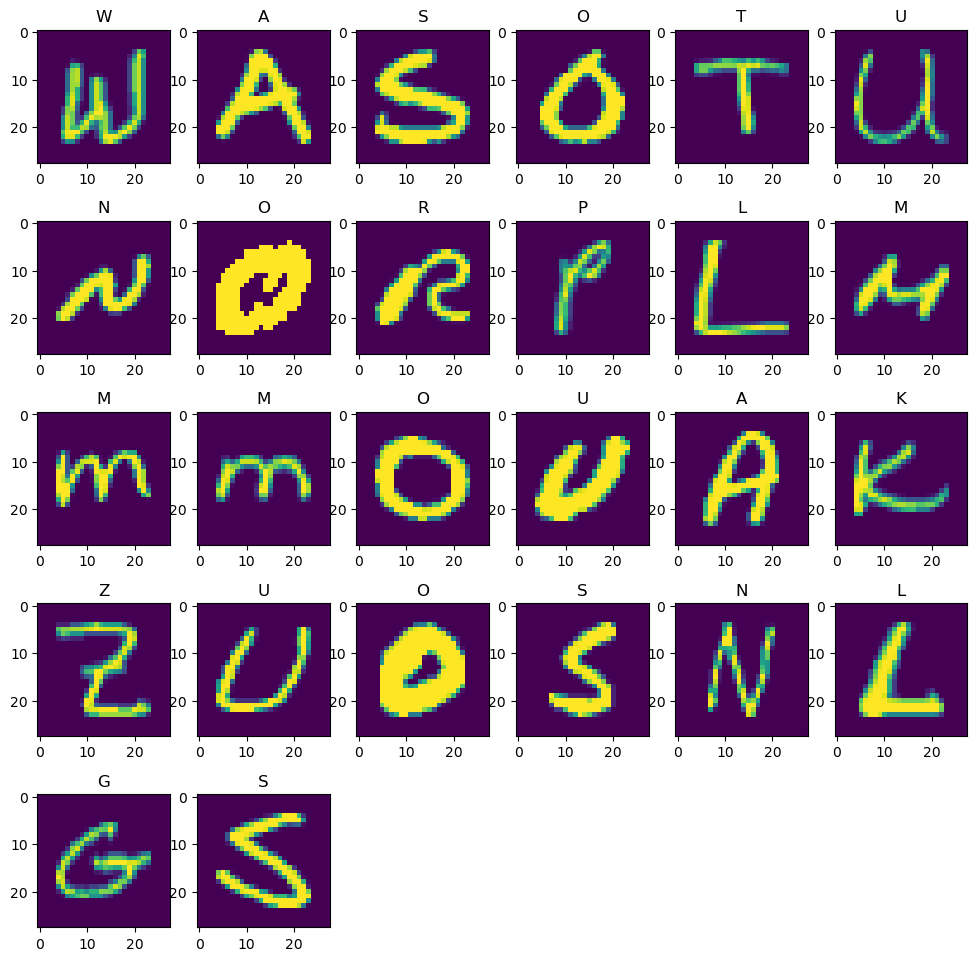

In [26]:
plt.figure(figsize=(12, 12))
idx = np.random.randint(0, 372451, 26)

for i in range(len(idx)):
    plt.subplot(5, 6, i+1)
    plt.title(y[idx[i]])
    img_grid = np.reshape(X.values[idx[i]], (28,28))
    plt.imshow(img_grid)

# Test Train Split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Training

In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\Users\Yalavarthi Saadhika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Prediction

In [29]:
y_test_pred = classifier.predict(X_test)

# Measuring Performance

# Accuracy

In [30]:
# calculate accuracy of class predictions

from sklearn import metrics

metrics.accuracy_score(y_test, y_test_pred)

0.8764511937108674

# Confusion Metrics

In [31]:
# print the confusion matrix
con_metrics = metrics.confusion_matrix(y_test, y_test_pred)
con_metrics

array([[ 2967,     9,     2,     8,    25,     1,     6,    60,     0,
            4,    17,     2,    66,    73,    18,    50,    17,    32,
           17,     1,    35,     7,     3,    41,    33,     4],
       [   17,  1768,    15,    23,    57,     0,     1,     6,     0,
            6,     2,     1,    14,     5,    64,     5,     3,    34,
          116,     0,    30,     0,     0,     4,    17,    22],
       [    2,    17,  5268,     1,    72,     0,    41,     3,     0,
            6,    14,    60,     1,    27,   185,    47,     5,    37,
           42,     8,    56,     0,     4,     1,    11,     3],
       [    4,    21,     1,  1937,     5,     0,     1,     1,     0,
           28,     1,     1,    12,     4,   351,    23,    12,     1,
           51,     0,    22,     0,     1,     6,     2,    13],
       [   10,    41,   136,     8,  2287,     5,    29,     1,     0,
            9,    41,    23,     0,    18,    18,    19,     2,    71,
           72,     1,    21,  

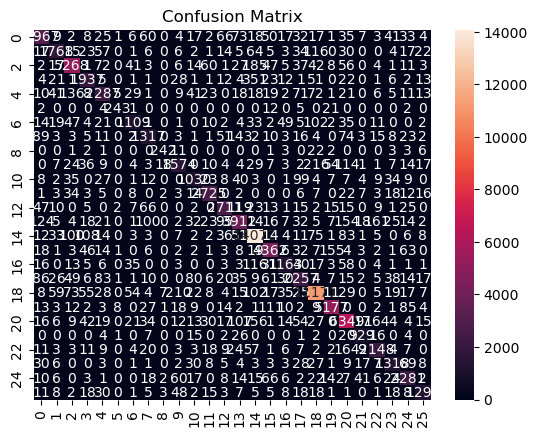

In [32]:
#ploting heatmap for confusion matrix

sns.heatmap(con_metrics, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

# Classification Report

In [33]:
#Checking Precision, Recall and F1 Score
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           A       0.84      0.85      0.85      3498
           B       0.86      0.80      0.83      2210
           C       0.90      0.89      0.90      5911
           D       0.83      0.78      0.80      2498
           E       0.83      0.80      0.82      2847
           F       0.93      0.84      0.88       290
           G       0.83      0.75      0.79      1473
           H       0.77      0.74      0.75      1789
           I       0.88      0.81      0.85       297
           J       0.78      0.73      0.75      2158
           K       0.76      0.76      0.76      1363
           L       0.92      0.94      0.93      2891
           M       0.88      0.88      0.88      3088
           N       0.80      0.82      0.81      4792
           O       0.92      0.96      0.94     14651
           P       0.89      0.92      0.91      4759
           Q       0.84      0.77      0.80      1519
           R       0.80    

# Decision Tree Model

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

y_test_pred = dt_classifier.predict(X_test)

metrics.accuracy_score(y_test, y_test_pred)

0.9479771890069056

# RandomForestClassifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_test_pred = dt_classifier.predict(X_test)

metrics.accuracy_score(y_test, y_test_pred)

0.9479771890069056